# Project Title
 ### **Data-Backed Strategies for a successful new movie studio**


# Project Overview
This project aims to uncover what type of films are currently doing the best at the box office. We are tasked with using various key data sets to build a unified view to help the head of the company make strategic decisions for a new movie studio. Using this consolidated data, through targeted hyothesis testing and visualizations we will translate our findings into clear and actionable insights.


## Objectives
1. To check if better reviews mean bigger profits.
2. Identify which film genres earn the most money at the box office to know which genre to prioritize.
3. To see which release quater makes the most so as to know when to schedule our major releases.

## Data Understanding

- Data Source; We are drawing our findings from three datasets namely
1. bom.movie_gross.csv
2. im.db sql database 
3. rt.reviews.tsv


### Import the necessary libraries


In [1]:
import pandas as pd
import sqlite3
import numpy as np


### 1. Reading the CSV File

In [2]:
df1 = pd.read_csv("bom.movie_gross.csv")
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### 1.2 Getting more information about the CSV

In [3]:
df1.info()
# we have 3387 rows and 5 columns
# the Data type in each column is indicated;object means its categorical, 
# float64 indicates numerical values with decimals, int64 numerical integer values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
df1.describe() # gives summary statistics of columns with numerical values


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [5]:
a = df1.shape # first value represents number of rows, the second shows the number of columns.
b = df1.columns # shows all the columns in our CSV file
print(a)
print(b)

(3387, 5)
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


### 1.3 Dealing with missing data in the CSV file

In [6]:
df1.duplicated() # checks for duplicates, False indcates that there are no duplicates in our data.

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [7]:
df1.isna().sum() # gives the sum of missing values in each column.
# only three columns have missing values( studio,domestic_gross and foreign_gross)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [8]:
df1['studio'].value_counts()
df1['studio'].fillna(df1['studio'].mode()[0],inplace=True)

In [9]:
df1['domestic_gross'].value_counts()
df1['domestic_gross'].fillna(df1['domestic_gross'].median(),inplace=True)

In [10]:
df1['foreign_gross'].value_counts()
df1.dropna(subset=['foreign_gross'],inplace=True)

In [11]:
df1.isna().sum() # we run this code again to ensure all the missing values have been eliminated.

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [12]:
df1.shape # check the remaining number of rows and columns.
          # we have 2037 rows and 5 clumns. The number of columns remained the same.

(2037, 5)

### 2. Connecting the sql file to a database
- Using sqlite3 + pandas

In [13]:
conn = sqlite3.connect("im_1.db") # connecting to a database
df2 = pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""",conn) # this code gives the list of tables in the sql
df2

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


### 2.1 To select data from a specific table from the 'im_1.db' sql database
  #### e.g Getting columns info from the movie_ratings table

In [14]:
conn = sqlite3.connect("im_1.db")
df2 = pd.read_sql("""SELECT * FROM movie_ratings;""",conn)
df2
#print(df2.isnull().sum()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


### 2.2 Dealing with missing values

In [15]:
#df2 = pd.read_sql("""SELECT * FROM movie_basics;""",conn)
#df2 = pd.read_sql("""SELECT * FROM persons;""",conn)
df2 = pd.read_sql("""SELECT * FROM movie_akas;""",conn)

#df2 = pd.read_sql("""SELECT * FROM principals;""",conn)
print(df2.isnull().sum()) #check for missing values in various tables

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64


   ##### Dealing with missing values in movie_basics table

In [16]:

cursor = conn.cursor()
#Fill missing original_title with primary_title
cursor.execute("""
UPDATE movie_basics
SET original_title = primary_title
WHERE original_title IS NULL;
""")

#Fill missing genres with 'Unknown'
cursor.execute("""
UPDATE movie_basics
SET genres = 'Unknown'
WHERE genres IS NULL;
""")

#Delete rows where runtime_minutes IS NULL
cursor.execute("""
DELETE FROM movie_basics
WHERE runtime_minutes IS NULL;
""")



In [17]:
df2 = pd.read_sql("""SELECT * FROM movie_basics;""",conn)
print(df2.isnull().sum()) #check for missing values in various tables

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


##### Dealing with missing values from persons table

In [18]:
cursor = conn.cursor()
#Fill missing primary_profession with 'Unknown'
cursor.execute("""
UPDATE persons
SET primary_profession = 'Unknown'
WHERE primary_profession IS NULL;
""")

#Delete rows where birth_year IS NULL
cursor.execute("""
DELETE FROM persons
WHERE birth_year IS NULL;
""")

#Delete rows where death_year  IS NULL
cursor.execute("""
DELETE FROM persons
WHERE death_year IS NULL;
""")



In [19]:
df2 = pd.read_sql("""SELECT * FROM persons;""",conn)
print(df2.isnull().sum()) #check for missing values in various tables

person_id             0
primary_name          0
birth_year            0
death_year            0
primary_profession    0
dtype: int64


### 3. Reading the TSV File

In [20]:
df3 = pd.read_csv("rt.reviews.tsv", sep='\t', encoding='latin1')
df3

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


### 3.1 Getting info about the TSV file

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [22]:
df3.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


### 3.2 Dealing with missing values from the TSV file

In [23]:
df3.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54427    False
54428    False
54429    False
54430    False
54431    False
Length: 54432, dtype: bool

In [24]:
df3.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [25]:
df3['review'].fillna('Unknown',inplace=True)

In [26]:
df3['critic'].fillna('Unknown',inplace=True)
df3['publisher'].fillna('Unknown',inplace=True)

In [27]:
df3.dropna(subset=['rating'],inplace=True)

In [28]:
df3.isna().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [29]:
df3.shape

(40915, 8)

## Data Analysis

### To get average domestic gross by genre


In [35]:
#Join the movie_basics table from im.db to bom.movie_gross.csv
#Write into SQL database
df1.to_sql("movie_gross",conn, if_exists="replace",index=False)

#Run the SQL query
query="""
SELECT
mb.genres,
AVG (CAST(mg.domestic_gross AS FLOAT)) AS avg_domestic_gross
FROM movie_basics AS mb
JOIN movie_gross AS mg 
ON mb.primary_title=mg.title
GROUP BY
mb.genres
ORDER BY
avg_domestic_gross DESC;
"""
avg_gross_df=pd.read_sql(query,conn)

print(avg_gross_df.head())


                    genres  avg_domestic_gross
0                   Sci-Fi        4.126000e+08
1  Documentary,Drama,Sport        4.126000e+08
2    Adventure,Drama,Sport        4.007000e+08
3           Comedy,Mystery        2.545000e+08
4  Action,Adventure,Sci-Fi        2.396196e+08


##### Sci-fi movies give the highest average domestic gross hence would recommend the new movie studio to produce more of these genre.

### Hypothesis Testing
 - Null Hypotheis: Higher IMDb-rated movies do not earn more on average than lower-rated ones.

 - Alternative Hypothesis: Higher IMDb-rated movies do earn more on average.

### Steps;
- Join movie_ratings, movie_basics tables from sql database with bom.movie_gross.csv
- Split movies into 'high' and 'low' rating groups (e.g threshhold at 5.0)
- Perform an independent t-test to compare the average gross revenue

In [44]:
from scipy.stats import ttest_ind

# load the data
movie_gross = pd.read_csv("bom.movie_gross.csv")
basics_df = pd.read_sql("SELECT movie_id,primary_title FROM movie_basics",conn)
ratings_df = pd.read_sql("SELECT movie_id, averagerating FROM movie_ratings",conn)

# Merge the data
merged_df =pd.merge(basics_df,ratings_df, on="movie_id")
final_df = pd.merge(merged_df,movie_gross,left_on="primary_title", right_on="title")

# Convert domestic_gross to numeric
final_df["domestic_gross"]= pd.to_numeric(final_df["domestic_gross"],errors="coerce")
final_df = final_df.dropna(subset=["averagerating","domestic_gross"])

#Splitting into groups
high_rated = final_df[final_df["averagerating"] >= 5]["domestic_gross"]
low_rated = final_df[final_df["averagerating"] < 5]["domestic_gross"]

#Conduct t-test
t_stat, p_value = ttest_ind(high_rated,low_rated, equal_var=True)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")





T-statistic: 1.5782502888063696
P-value: 0.11461511972505915


##### Since the p-value is less than 0.05, we fail to reject the null hypothesis and conclude that there is no enough statistical evidence to show that higher IMDb-rated movies earn more on average then lower-rated movies at the box office at 5% significance level.


### Data Visualization

#### 1. High vs Low rated IMDb movies

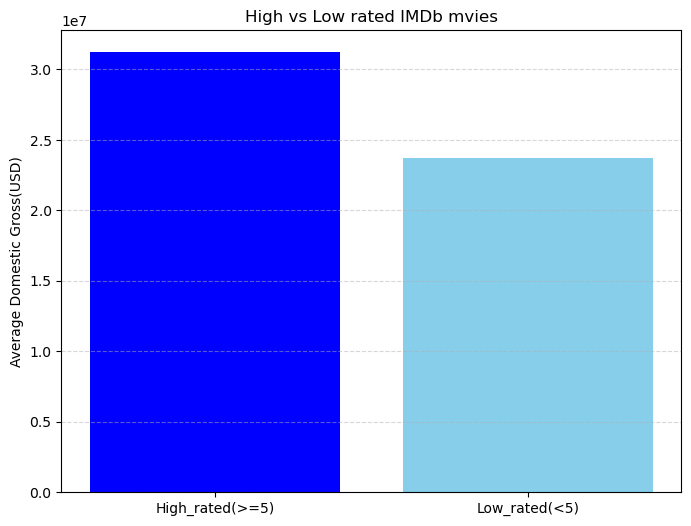

In [61]:
import matplotlib.pyplot as plt

#Calculate the means
mean_high = high_rated.mean()
mean_low = low_rated.mean()

labels = ['High_rated(>=5)', 'Low_rated(<5)']
means = [mean_high,mean_low]

#Plot
plt.figure(figsize=(8,6))
bars= plt.bar(labels,means, color= ['blue', 'skyblue'])
plt.title('High vs Low rated IMDb mvies')
plt.ylabel('Average Domestic Gross(USD)')
plt.grid(axis='y', linestyle='--',alpha=0.5)

plt.show()

#### 2. Average Domestic Gross by genre

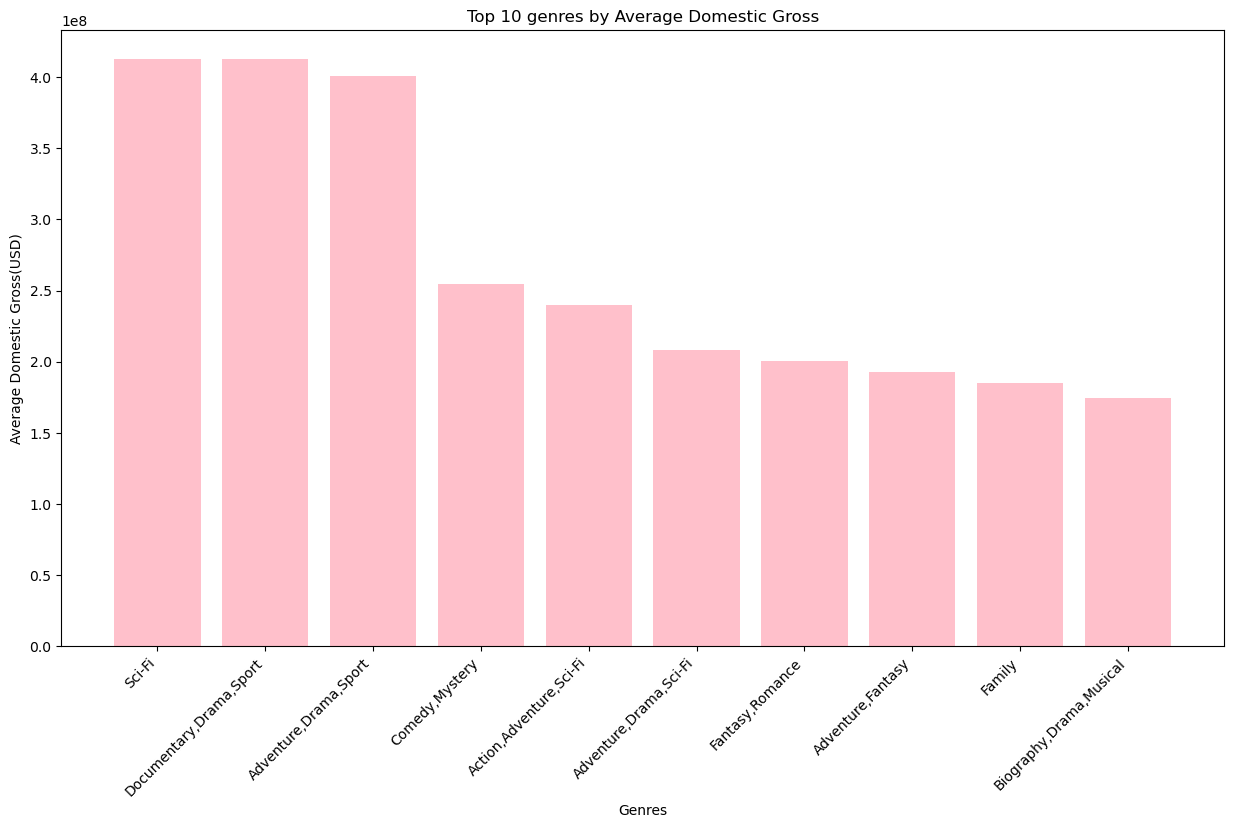

In [60]:
import matplotlib.pyplot as plt
#Sort data by gross
top10_genres =avg_gross_df.sort_values(by='avg_domestic_gross',ascending=False).head(10)

#Set up the figure size
plt.figure(figsize=(15,8))

#Create the barchart
plt.bar(top10_genres['genres'], top10_genres['avg_domestic_gross'],color='pink')
        
#Add titles and labels
plt.title('Top 10 genres by Average Domestic Gross')
plt.xlabel('Genres')
plt.ylabel('Average Domestic Gross(USD)') 

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()
        
        



### Conclusion and Recommendation
- Sci-fi movies gave the highest domestic gross hence would recommend the new movie studio to produce more of these genre.
- High rated IMDb movies generated more revenue compared to the low-rated IMDb movies.